<a href="https://colab.research.google.com/github/shivendr7/ml/blob/assignments/resnet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.layers import Add, Flatten, Dense, MaxPooling2D, Conv2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels)=load_data()

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), <matplotlib.image.AxesImage at 0x7fbd2950ef90>)

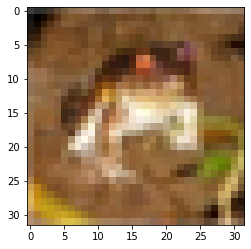

In [9]:
train_images.shape, plt.imshow(train_images[0])

In [15]:
#linking layers
x1=Input(shape=(32,32,3))
x2=Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x1)
x3=MaxPooling2D()(x2)
x4=Conv2D(3, kernel_size=(3,3), padding='same')(x3)
m1=Model(inputs=x1, outputs=x4)
m1.compile()
m1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 3)         1731      
Total params: 3,523
Trainable params: 3,523
Non-trainable params: 0
_________________________________________________________________


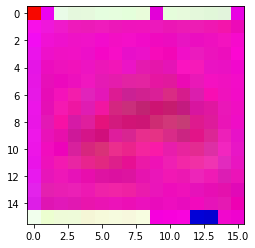

In [24]:
Out=m1.predict(train_images[0].reshape(1,32,32,3))
plt.imshow(Out.astype('uint8').reshape(16,16,3))

In [33]:
#first resnet [Convolution Block]
x1=Input(shape=(32,32,3))
x2=Conv2D(64, kernel_size=(1,1), activation='relu', padding='same')(x1)
x3=Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x2)
x4=Conv2D(128, kernel_size=(1,1), activation='relu', padding='same')(x3)
ConvBridge=Conv2D(128, kernel_size=(1,1), activation='relu', padding='same')(x1)


x5=Add()([x4, ConvBridge])
x7=Conv2D(1, kernel_size=(3,3), activation='relu', padding='same')(x5)
x6=MaxPooling2D()(x7)
Out2=Model(inputs=x1, outputs=x6)
Out2.compile()
Out2.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 32, 32, 64)   256         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_37[0][0]                  
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 32, 32, 128)  8320        conv2d_38[0][0]                  
____________________________________________________________________________________________

(<matplotlib.image.AxesImage at 0x7fbd21b37310>, (1, 16, 16, 1))

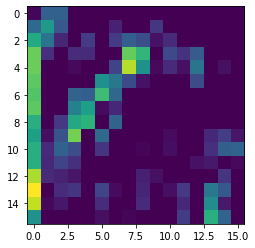

In [39]:
out=Out2.predict(train_images[0].reshape(1,32,32,3))
plt.imshow(out.reshape(16,16)), out.shape

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
train_labels=tensorflow.keras.utils.to_categorical(train_labels, 10)
test_labels=tensorflow.keras.utils.to_categorical(test_labels, 10)
train_labels.shape

(60000, 10)

In [11]:
x1=Input(shape=(28,28,1))
xConv=Conv2D(3, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(x1)
x6=Conv2D(6, kernel_size=(3,3), padding='same', activation='relu')(x1)
x2=Conv2D(3, kernel_size=(3,3), padding='same', activation='relu')(x1)
x3=MaxPooling2D()(x2)
x4=Add()([xConv, x3])
x5=Flatten()(x4)
x6=Dense(10, activation='softmax')(x5)
resnet_model=Model(inputs=x1, outputs=x6)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 3)    30          input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 14, 14, 3)    30          input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 3)    0           conv2d_10[0][0]                  
____________________________________________________________________________________________

In [12]:
resnet_model.fit(train_images, train_labels, epochs=2, verbose=2)

Epoch 1/2
1875/1875 - 21s - loss: 4.5211 - accuracy: 0.8223
Epoch 2/2
1875/1875 - 20s - loss: 0.4660 - accuracy: 0.9069


In [13]:
loss, accuracy=resnet_model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2612 - accuracy: 0.9248


In [14]:
loss, accuracy

(0.26115113496780396, 0.9247999787330627)

In [17]:
import numpy as np

(<matplotlib.image.AxesImage at 0x7f314c7e43d0>, 2)

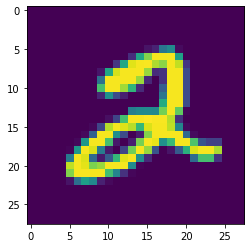

In [18]:
plt.imshow(train_images[5].reshape(28,28)), np.argmax(resnet_model.predict(train_images[5].reshape(1,28,28,1)))